In [656]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [657]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\thanu\untitled1\insectdetection\dataset\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1099 files belonging to 12 classes.


In [658]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\thanu\untitled1\insectdetection\dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",    
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3707 files belonging to 12 classes.


In [659]:
''''import os
import cv2


dataset_dir = r"C:\Users\thanu\untitled1\insectdetection\dataset\train"

desired_width = 128
desired_height = 128

for root, dirs, files in os.walk(dataset_dir):
    for filename in files:
       
        image_path = os.path.join(root, filename)
        image = cv2.imread(image_path)
        
      
        if image is not None:
            # Resize the image
            resized_image = cv2.resize(image, (desired_width, desired_height))
            
       
            cv2.imwrite(image_path, resized_image)
            print("resize complete")
        else:
            print(f"Warning: Could not read image {image_path}")


SyntaxError: incomplete input (2942965159.py, line 1)

In [660]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

In [661]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [662]:
cnn = tf.keras.models.Sequential()

In [663]:
###Building Convolution Layer

In [664]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [665]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [666]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [667]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [668]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [669]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [670]:
cnn.add(tf.keras.layers.Flatten())

In [671]:
cnn.add(tf.keras.layers.Dense(units=1100,activation='relu'))

In [672]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [673]:
cnn.add(tf.keras.layers.Dense(units=12,activation='softmax'))

In [674]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [675]:
cnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_243 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_244 (Conv2D)         (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_110 (MaxPool  (None, 63, 63, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_245 (Conv2D)         (None, 63, 63, 64)        18496     
                                                                 
 conv2d_246 (Conv2D)         (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_111 (MaxPool  (None, 30, 30, 64)        0         
 ing2D)                                              

In [685]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
35/35 [==============================] - 71s 2s/step - loss: 0.2381 - accuracy: 0.9199 - val_loss: 2.9141 - val_accuracy: 0.4394
Epoch 2/10
35/35 [==============================] - 67s 2s/step - loss: 0.1505 - accuracy: 0.9500 - val_loss: 2.9204 - val_accuracy: 0.4421
Epoch 3/10
35/35 [==============================] - 64s 2s/step - loss: 0.1653 - accuracy: 0.9472 - val_loss: 3.0050 - val_accuracy: 0.4467
Epoch 4/10
35/35 [==============================] - 64s 2s/step - loss: 0.2164 - accuracy: 0.9399 - val_loss: 2.9514 - val_accuracy: 0.4411
Epoch 5/10
35/35 [==============================] - 66s 2s/step - loss: 0.1467 - accuracy: 0.9554 - val_loss: 2.8948 - val_accuracy: 0.4570
Epoch 6/10
35/35 [==============================] - 68s 2s/step - loss: 0.0962 - accuracy: 0.9636 - val_loss: 3.8587 - val_accuracy: 0.3944
Epoch 7/10
35/35 [==============================] - 70s 2s/step - loss: 0.0807 - accuracy: 0.9736 - val_loss: 3.3048 - val_accuracy: 0.4429
Epoch 8/10
35/35 [==

In [686]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

35/35 [==============================] - 7s 185ms/step - loss: 0.0058 - accuracy: 0.9991
Training accuracy: 0.9990900754928589


In [687]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

116/116 [==============================] - 22s 189ms/step - loss: 3.6711 - accuracy: 0.4510
Validation accuracy: 0.45103856921195984


In [688]:
cnn.save('trained_insect_detection.keras')

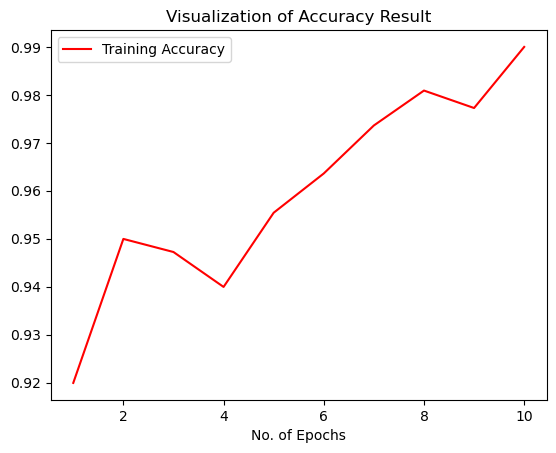

In [690]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()